1、使用课程数据中的“date_data2.csv”数据，使用C50和CART分别构建决策树，并解释婚恋网站男性客户是否被相亲的模式。

In [20]:
date2<-read.csv("data/date_data2.csv",fileEncoding="GBK")

head(date2)

income,attractive,assets,edueduclass,Dated,income_rank,attractive_rank,assets_rank
3000,9.0,5.145476,1,0,0,0,0
3000,14.5,40.643781,4,1,0,0,1
3000,6.0,5.145476,1,0,0,0,0
3000,1.0,7.067434,1,0,0,0,0
3500,14.5,3.728400,2,0,0,0,0
3500,28.0,12.569146,3,0,0,1,0


In [25]:
explaned_col<-"Dated"
explan_cols<-c("edueduclass","income_rank","attractive_rank","assets_rank")


date2<-date2[,c(explan_cols,explaned_col)]

date2<-na.omit(date2)

for(ec in colnames(date2)){
     date2[,ec]=as.factor(date2[,ec])
}
    
head(date2)


edueduclass,income_rank,attractive_rank,assets_rank,Dated
1,0,0,0,0
4,0,0,1,1
1,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,1,0,0


In [26]:
set.seed(10)
select<-sample(1:nrow(date2),length(date2$Dated)*0.7)
train=date2[select,]
test=date2[-select,]
summary(date2$Dated)

0  1 
50 50

In [27]:
library(C50)
tc<-C5.0Control(minCases = 2,winnow=F,CF=0.99,noGlobalPruning=T)

In [28]:
model<- C5.0(Dated~.,data=train,rules = F,control = tc)

summary(model)


Call:
C5.0.formula(formula = Dated ~ ., data = train, rules = F, control = tc)


C5.0 [Release 2.07 GPL Edition]  	Thu Nov 10 22:07:23 2016
-------------------------------

Class specified by attribute `outcome'

Read 70 cases (5 attributes) from undefined.data

Decision tree:

assets_rank in {0,1}:
:...edueduclass in {1,2,3,5,6}: 0 (25)
:   edueduclass = 4:
:   :...attractive_rank in {0,2,3}: 0 (9/2)
:       attractive_rank = 1: 1 (1)
assets_rank in {2,3}:
:...assets_rank = 3: 1 (20)
    assets_rank = 2:
    :...attractive_rank = 0: 0 (1)
        attractive_rank in {1,2,3}: 1 (14/2)


Evaluation on training data (70 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6    4( 5.7%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	    33     2    (a): class 0
	     2    33    (b): class 1


	Attribute usage:

	100.00%	assets_rank
	 50.00%	edueduclass
	 35.71%	attractive_rank


Time: 0.0 secs


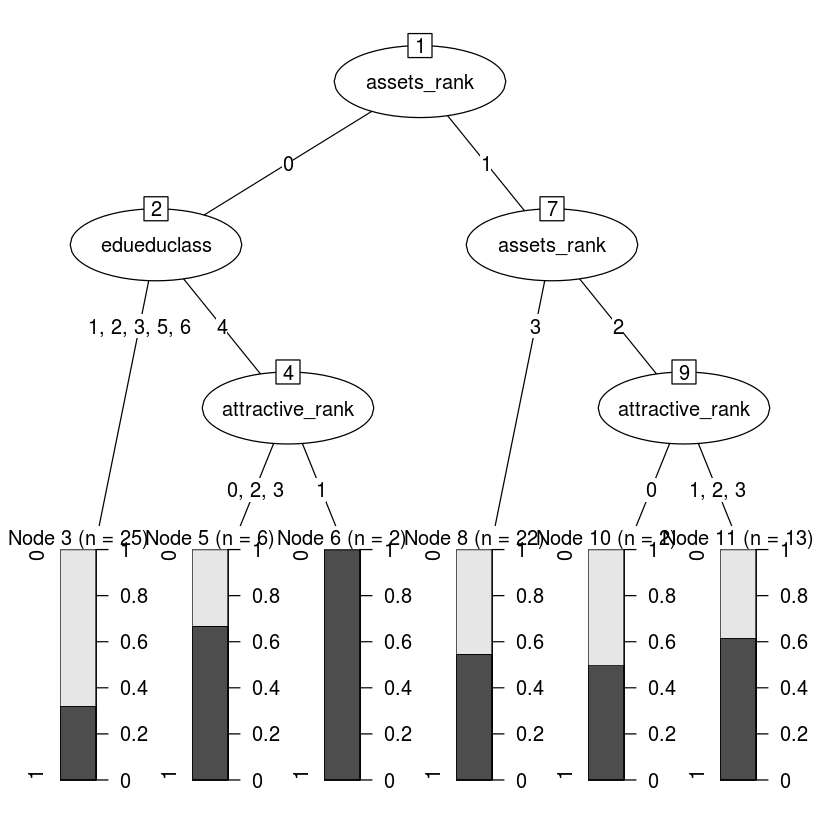

In [29]:
plot(model)

In [30]:
C5imp(model)

,Overall
assets_rank,100.00
edueduclass,50.00
attractive_rank,35.71
income_rank,0.00


In [32]:
rule<- C5.0(Dated ~.,data=train,rules=T,control =tc)
summary( rule )


Call:
C5.0.formula(formula = Dated ~ ., data = train, rules = T, control = tc)


C5.0 [Release 2.07 GPL Edition]  	Thu Nov 10 22:09:52 2016
-------------------------------

Class specified by attribute `outcome'

Read 70 cases (5 attributes) from undefined.data

Rules:

Rule 1: (25, lift 1.9)
	edueduclass in {1, 2, 3}
	assets_rank in {0, 1}
	->  class 0  [0.963]

Rule 2: (26/2, lift 1.8)
	attractive_rank in {0, 2, 3}
	assets_rank in {0, 1}
	->  class 0  [0.893]

Rule 3: (14/3, lift 1.5)
	attractive_rank = 0
	->  class 0  [0.750]

Rule 4: (20, lift 1.9)
	assets_rank = 3
	->  class 1  [0.955]

Rule 5: (32/2, lift 1.8)
	attractive_rank in {1, 2, 3}
	assets_rank in {2, 3}
	->  class 1  [0.912]

Rule 6: (7, lift 1.8)
	edueduclass = 4
	attractive_rank = 1
	->  class 1  [0.889]

Default class: 0


Evaluation on training data (70 cases):

	        Rules     
	  ----------------
	    No      Errors

	     6    4( 5.7%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	    33     2    (a):

In [33]:
library(rpart)

tc <- rpart.control(minsplit=20,minbucket=20,maxdepth=10,xval=5,cp=0.005)

In [34]:
rpart.mod=rpart(Dated ~.,data=train,method="class",
                parms = list(prior = c(0.65,0.35), split = "gini"),
                control=tc)
summary(rpart.mod)

Call:
rpart(formula = Dated ~ ., data = train, method = "class", parms = list(prior = c(0.65, 
    0.35), split = "gini"), control = tc)
  n= 70 

        CP nsplit rel error   xerror      xstd
1 0.755102      0  1.000000 1.000000 0.1195229
2 0.005000      1  0.244898 0.244898 0.1001932

Variable importance
    assets_rank     edueduclass     income_rank attractive_rank 
             39              27              24              10 

Node number 1: 70 observations,    complexity param=0.755102
  predicted class=0  expected loss=0.35  P(node) =1
    class counts:    35    35
   probabilities: 0.650 0.350 
  left son=2 (35 obs) right son=3 (35 obs)
  Primary splits:
      assets_rank     splits as  LLRR,   improve=21.208480, (0 missing)
      edueduclass     splits as  LLLRRR, improve=13.664300, (0 missing)
      income_rank     splits as  LLRR,   improve= 6.073023, (0 missing)
      attractive_rank splits as  LRLR,   improve= 1.163529, (0 missing)
  Surrogate splits:
      edueduclass

In [35]:
rpart.mod$variable.importance

assets_rank     edueduclass     income_rank attractive_rank 
       21.20848        14.54296        13.33105         5.45361

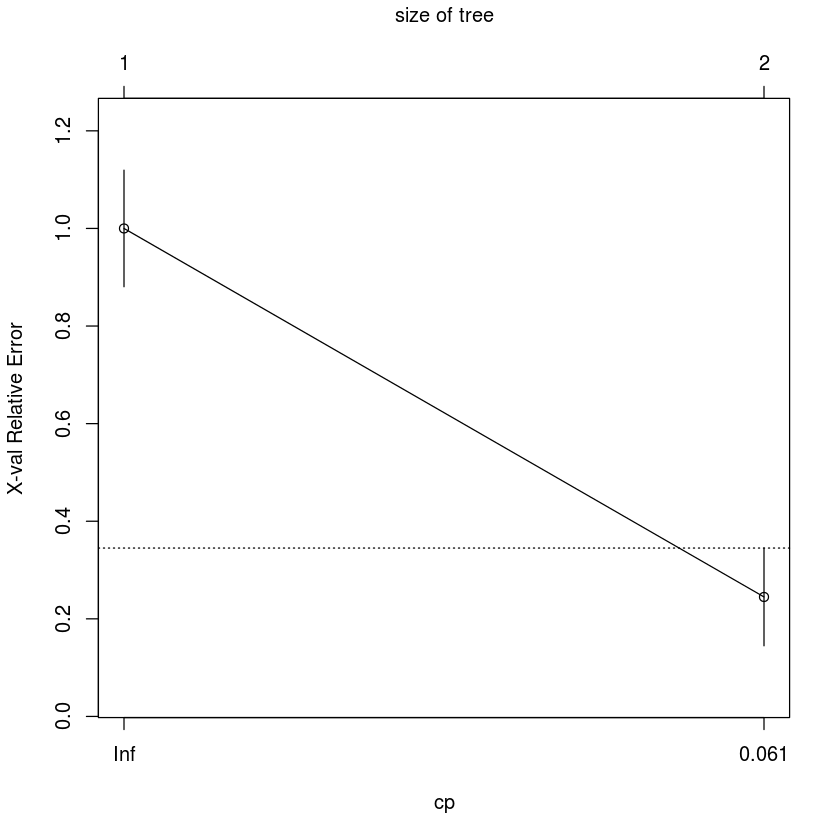

In [41]:
plotcp(rpart.mod)

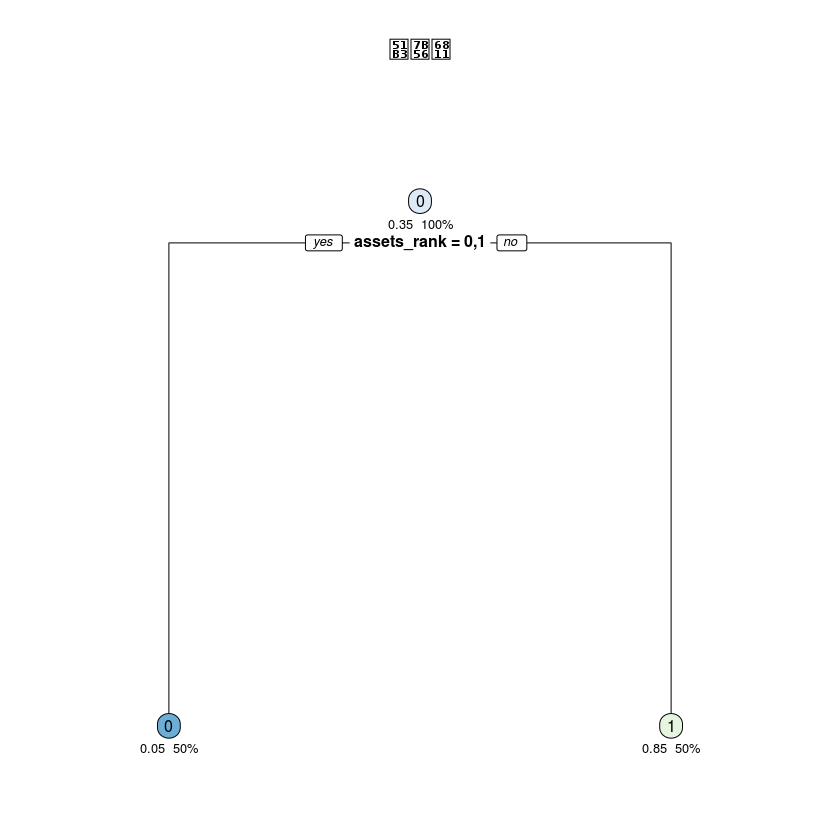

In [40]:
library(rpart.plot)

rpart.plot(rpart.mod,branch=1, extra=106, under=TRUE, faclen=0,
           cex=0.8, main="决策树")

2、比较C50和CART两个决策树是否一致？预测的准确性是否相似？

In [51]:
c50_pred<-predict(model,test)

c50_pred

[1] 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1
Levels: 0 1

In [42]:
#使用cart預測
rpart.mod.pru<-prune(rpart.mod, cp= rpart.mod$cptable[which.min(rpart.mod$cptable[,"xerror"]),"CP"]) 
rpart.mod.pru$cp

,CP,nsplit,rel error,xerror,xstd
1,0.755102,0,1.000000,1.000000,0.1195229
2,0.005000,1,0.244898,0.244898,0.1001932


In [43]:
rpart.pred<-predict(rpart.mod.pru,test)

In [49]:
cart_pred<-predict(rpart.mod.pru,test,type="class")

cart_pred

4  8 11 13 16 19 24 25 29 30 32 34 35 36 39 47 48 54 64 65 66 72 80 82 83 87 
 0  0  0  0  0  0  1  0  1  1  0  1  0  0  1  0  1  1  1  1  0  0  1  1  1  1 
88 89 91 92 
 0  1  1  1 
Levels: 0 1

In [50]:
table(c50_pred,cart_pred)

        cart_pred
c50_pred  0  1
       0 13  3
       1  1 13

3、运行“第8讲_2 汽车贷款违约的模式表述.R”这个脚本，使用C50做决策树，描述你发现的违约和不违约人群的模式。